## Building and Training the Model

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# Load and preprocess dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255, test_images / 255

In [10]:
print("Training:",train_images.shape)
print("Testing:",test_images.shape)

Training: (50000, 32, 32, 3)
Testing: (10000, 32, 32, 3)


In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

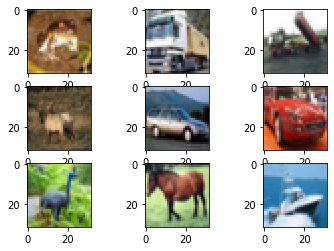

In [12]:
for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(train_images[i])
plt.show()

In [13]:
#Setup data augmentation
traingen = ImageDataGenerator(
    rotation_range=0,
    horizontal_flip=True,
    vertical_flip=False,
    width_shift_range=0.15,
    height_shift_range=0.15
    )
traingen.fit(train_images)

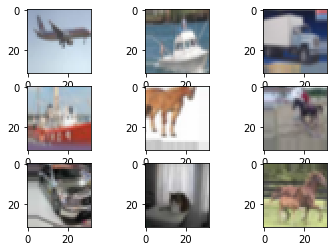

In [14]:
#Show example augmented images
for X_batch, y_batch in traingen.flow(train_images, train_labels, batch_size=9):
    for i in range(0,9):
        plt.subplot(330+1+i)
        plt.imshow(X_batch[i])
    plt.show()
    break

In [15]:
basicModel = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    #layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', strides=[2,2]),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Dropout(0.3),
    #layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', strides=[2,2]),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(10, (1,1), activation='relu', padding='valid'),
    layers.GlobalAveragePooling2D(),
    layers.Softmax()
], name = "basic_model")

In [16]:
basicModel.summary()

Model: "basic_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         

In [17]:
opt = tf.keras.optimizers.SGD(lr=0.05, momentum=0.8, decay=1e-7)

basicModel.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
BATCHSIZE = 50
EPOCHS = 50

# Without Augment
#history = basicModel.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCHSIZE,
#                         validation_data=(test_images, test_labels))

# With Augment
history = basicModel.fit(traingen.flow(train_images, train_labels, batch_size=BATCHSIZE), 
                         epochs=EPOCHS, validation_data=(test_images, test_labels))


  ...
    to  
  ['...']
Train for 1000 steps, validate on 10000 samples
Epoch 1/50
1000/1000 [==============================] - 94s 94ms/step - loss: 2.2808 - accuracy: 0.1554 - val_loss: 2.2327 - val_accuracy: 0.2199
Epoch 2/50
1000/1000 [==============================] - 93s 93ms/step - loss: 2.2336 - accuracy: 0.2116 - val_loss: 2.2051 - val_accuracy: 0.2498
Epoch 3/50
 187/1000 [====>.........................] - ETA: 1:15 - loss: 2.2138 - accuracy: 0.2355

313/313 - 1s - loss: 1.8975 - accuracy: 0.5614


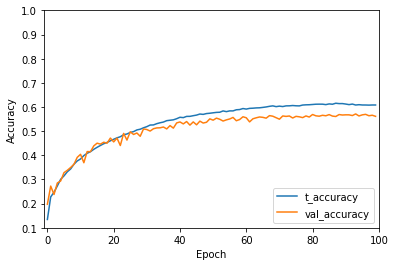

In [11]:
plt.plot(history.history['accuracy'], label='t_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.xlim([-1, 100])
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = basicModel.evaluate(test_images,  test_labels, verbose=2)

In [10]:
basicModel.save("basicCifar10")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: basicCifar10/assets


## Loading and Evaluating the Model

In [11]:
cifar10model = models.load_model("basicCifar10")

In [12]:
t1 = time.time()
loss, acc = cifar10model.evaluate(test_images, test_labels, verbose=2)
t2 = time.time()

print("elapsed:", (t2-t1)*1000, "ms")
print("average:", (t2-t1)*1000/(test_images.shape[0]), "ms")

10000/10000 - 1s - loss: 0.8569 - accuracy: 0.7111
elapsed: 1080.589771270752 ms
average: 0.1080589771270752 ms
